## Redes Neurais Artificiais 2020.1

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta terceira parte do Projeto Prático 3 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from joblib import Parallel, delayed

In [ ]:
# Montando o drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Extraindo o data frame
df = pd.read_csv('/content/drive/Shared drives/RNA/covtype.csv', sep=',')

In [ ]:
# Limpando atributos categóricos

categoricos = []

for i in range(40):
  if i < 4:
    categoricos.append("Wilderness_Area"+str(i+1))
  categoricos.append("Soil_Type"+str(i+1))

df = df.drop(columns=categoricos)  

# Separação dos atributos alvo e preditores.
X_atributo_preditor = df.drop(columns=["Cover_Type"])
Y_atributo_alvo = df["Cover_Type"]

# Separação dos dados para treino e teste. Proporção: 70% para treino e 30% para teste
X_train, X_test, Y_train, Y_test = train_test_split(X_atributo_preditor, Y_atributo_alvo, test_size=0.3, train_size=0.7)

# Padronozação
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)  
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10),
                    max_iter=300,
                    solver="adam",
                    activation="relu",
                    random_state=1,  
                    verbose=True
                    ).fit(X_train_std, Y_train)

Iteration 1, loss = 0.92869284
Iteration 2, loss = 0.70764073
Iteration 3, loss = 0.68924431
Iteration 4, loss = 0.68056128
Iteration 5, loss = 0.67444279
Iteration 6, loss = 0.67034351
Iteration 7, loss = 0.66809747
Iteration 8, loss = 0.66640913
Iteration 9, loss = 0.66488941
Iteration 10, loss = 0.66366401
Iteration 11, loss = 0.66260402
Iteration 12, loss = 0.66185198
Iteration 13, loss = 0.66116009
Iteration 14, loss = 0.66042423
Iteration 15, loss = 0.65980444
Iteration 16, loss = 0.65916715
Iteration 17, loss = 0.65868544
Iteration 18, loss = 0.65824577
Iteration 19, loss = 0.65799649
Iteration 20, loss = 0.65769488
Iteration 21, loss = 0.65745356
Iteration 22, loss = 0.65731637
Iteration 23, loss = 0.65707887
Iteration 24, loss = 0.65693932
Iteration 25, loss = 0.65667143
Iteration 26, loss = 0.65642239
Iteration 27, loss = 0.65628994
Iteration 28, loss = 0.65617509
Iteration 29, loss = 0.65588787
Iteration 30, loss = 0.65580250
Iteration 31, loss = 0.65586332
Iteration 32, los

In [ ]:
# Extraindo a predição

predicao = clf.predict(X_test_std)

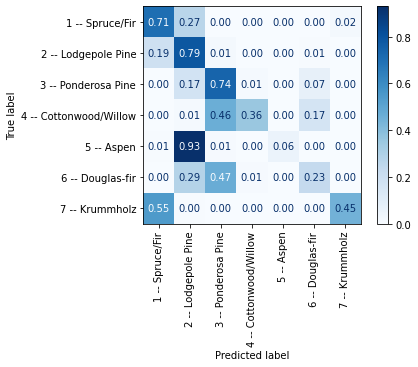

In [ ]:
rows = ("1 -- Spruce/Fir", "2 -- Lodgepole Pine", "3 -- Ponderosa Pine", "4 -- Cottonwood/Willow", "5 -- Aspen", "6 -- Douglas-fir", "7 -- Krummholz")
plot_confusion_matrix(clf, X_test_std, Y_test,
                                 display_labels=rows,
                                 cmap=plt.cm.Blues,
                                 normalize='true',values_format = '.2f', xticks_rotation='vertical')

plt.show()

Matriz de Confusao


(0.0, 1.0, 0.0, 1.0)

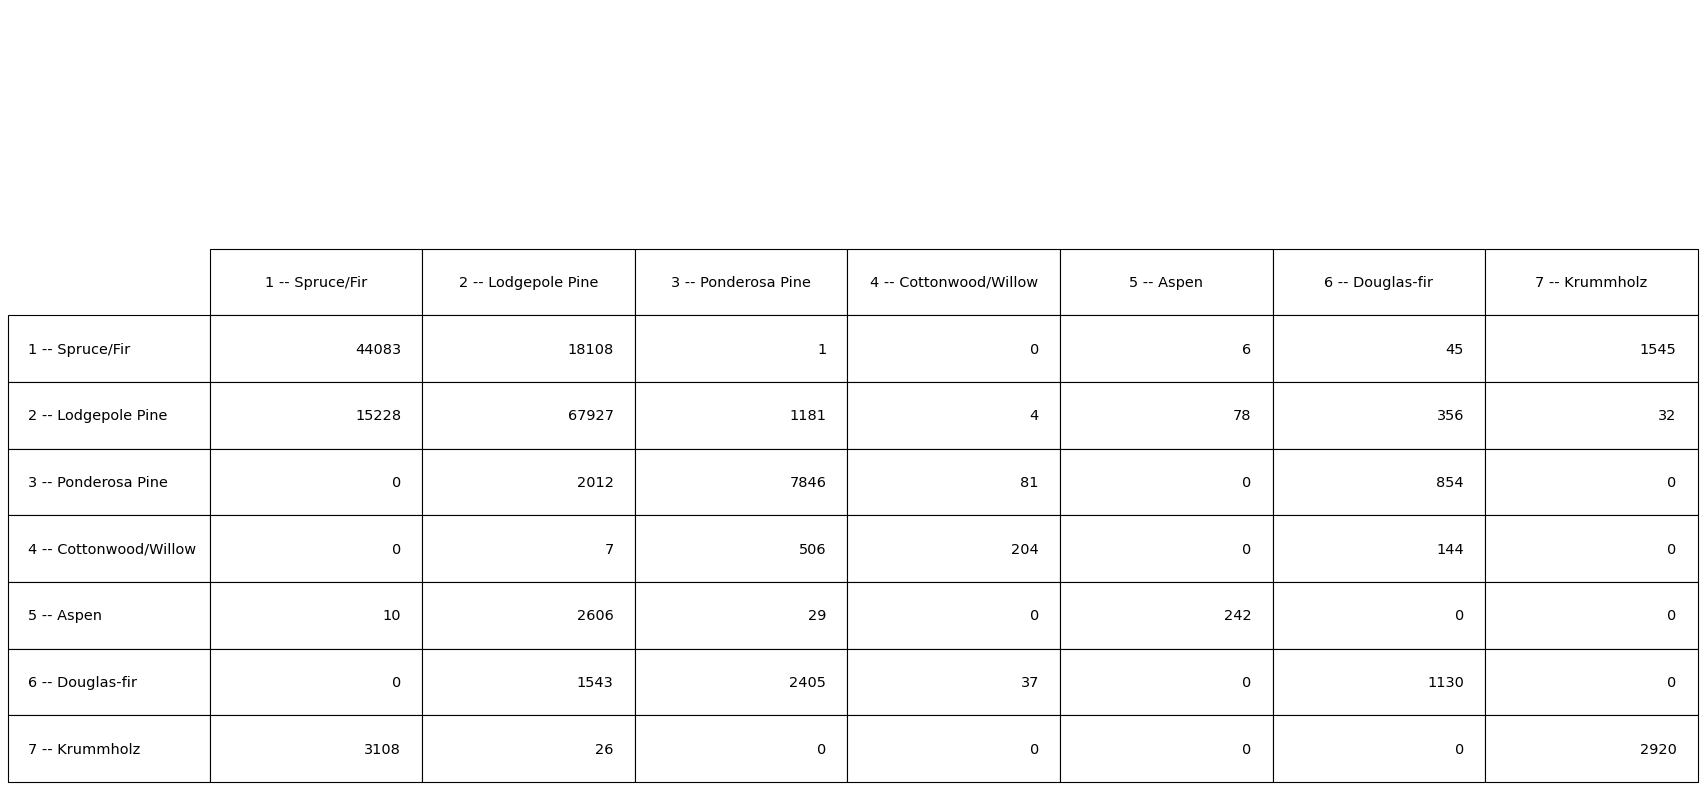

In [ ]:
# Matriz de confusão

mat_confusao = confusion_matrix(Y_test, predicao)

print("Matriz de Confusao")

columns = ("1 -- Spruce/Fir", "2 -- Lodgepole Pine", "3 -- Ponderosa Pine", "4 -- Cottonwood/Willow", "5 -- Aspen", "6 -- Douglas-fir", "7 -- Krummholz")
rows = ("1 -- Spruce/Fir", "2 -- Lodgepole Pine", "3 -- Ponderosa Pine", "4 -- Cottonwood/Willow", "5 -- Aspen", "6 -- Douglas-fir", "7 -- Krummholz")

fig = plt.figure(dpi = 80)
ax = fig.add_subplot(1, 1, 1)

table = ax.table(cellText=mat_confusao, rowLabels=rows, colLabels=columns)
table.set_fontsize(30)
table.scale(4,5)
ax.axis('off')

In [ ]:
# Calculo de Acurácia, precisão, F1-Score e Recall

print("Calculo de Acurácia, precisão, F1-Score e Recall:\n")
print("Acuracia:", round(accuracy_score(Y_test, predicao), 4))
print("Precisao:", round(precision_score(Y_test, predicao, average='macro'), 4))
print("F1-score:", round(f1_score(Y_test, predicao, average='macro'), 4)) 
print("Recall:", round(recall_score(Y_test, predicao, average='macro'), 4))

Calculo de Acurácia, precisão, F1-Score e Recall:

Acuracia: 0.7136
Precisao: 0.671
F1-score: 0.5113
Recall: 0.4765


In [ ]:
# Função que treina 100 vezes uma rede neural
# Recebe como parâmetro uma string que é o solver
# Particiona a cada execução o conjunto de treino e teste de maneira aleatória

def train(slv):
  v_acuracia = np.zeros(100)
  v_f1score = np.zeros(100)

  for i in range(100):
    print(i, end=" ")

    # Separação dos dados para treino e teste. Proporção: 70% para treino e 30% para teste
    X_train, X_test, Y_train, Y_test = train_test_split(X_atributo_preditor, Y_atributo_alvo, test_size=0.3, train_size=0.7)

    # Padronozação
    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)  
    X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
    
    clf = MLPClassifier(hidden_layer_sizes=(10),
                        max_iter=300,
                        solver=slv,
                        activation="relu",
                        random_state=1,  
                        verbose=False
                        ).fit(X_train_std, Y_train)

    # Extraindo a predi4/1AfDhmrjR-kEkP3QXaB0On5IMjX1MvUFQCJDqAdd6YyDmZZrbrvYn7VadlJUção
    predicao = clf.predict(X_test_std)

    v_acuracia[i] = accuracy_score(Y_test, predicao)
    v_f1score[i] = f1_score(Y_test, predicao, average="macro")

  print("\n\nResultados obtidos usando o solver " + slv + ":\n")

  print("Média da Acurácia:", round(v_acuracia.mean(), 4))
  print("Desvio Padrão da Acurácia:", round(v_acuracia.std(), 4))
  print("Média do F-Score:", round(v_f1score.mean(), 4))
  print("Desvio Padrão do F-Score:", round(v_f1score.std(), 4))

In [ ]:
# Executando o exemplo anterior 100 vezes
train("adam")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
Resultados obtidos usando o solver adam:

Média da Acurácia: 0.7154
Desvio Padrão da Acurácia: 0.0023
Média do F-Score: 0.5174
Desvio Padrão do F-Score: 0.009


In [ ]:
# Executando o exemplo anterior 100 vezes utilizando o otimizador SGD
train("sgd")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
Resultados obtidos usando o solver sgd:

Média da Acurácia: 0.7165
Desvio Padrão da Acurácia: 0.0013
Média do F-Score: 0.4673
Desvio Padrão do F-Score: 0.0108


## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_h$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?